# Heap Sort

## Author: Timothy Proffitt

## CS 2500 (Algorithms) @ Missouri S&T

## Prerequisite Packages

We will use the numpy and matplotlib library in this notebook

In [1]:
# Install all the prerequisite packages from the Terminal
!pip install numpy
!pip install matplotlib

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import copy

# The Heap Class 

We have to set up a Heap class that turns our array into a heap so we can use heapsort efficiently. Functions for Heap Sort are also included within the class, so they can just be called on our object.

In [10]:
class Heap:
  def __init__(self, A):
    self.max_heap = A
    self.heap_size = len(A)

  def parent(self, i):
    return self.max_heap[math.floor(i / 2)]

  def left(self, i):
    return 2 * i +1

  def right(self, i):
    return 2 * i + 2

  def max_heapify(self, i):
    l = self.left(i)
    r = self.right(i)
    largest = i
    if l < self.heap_size and self.max_heap[l] > self.max_heap[i]:
      largest = l
    if r < self.heap_size and self.max_heap[r] > self.max_heap[largest]:
      largest = r
    if largest != i:
      self.max_heap[i], self.max_heap[largest] = self.max_heap[largest], self.max_heap[i]
      self.max_heapify(largest)
    

  def build_max_heap(self):
    self.heap_size = len(self.max_heap)
    for i in range(self.heap_size // 2 -1, -1, -1):
      self.max_heapify(i)
      
    

  def heapsort(self):
    self.build_max_heap()
    for i in range(len(self.max_heap) -1, 0,-1):
      self.max_heap[i], self.max_heap[0] = self.max_heap[0], self.max_heap[i]
      self.heap_size = self.heap_size - 1
      self.max_heapify(0)
      
      
  
  
  
  def print_heap(self):
    print(f'Sorted array: {self.max_heap}')

# Test 

We're testing for correctness using a test input and outputting each step along the way (included in the functions).

In [11]:
list = [4,1,3,2,16,9,10,14,8,7]
list = Heap(list)
list.heapsort()
list.print_heap()

Sorted array: [1, 2, 3, 4, 7, 8, 9, 10, 14, 16]


# Plotting Run-Time Complexity

In [8]:
# Generate a random array of given size.
def generate_random_input(size):
    arr = np.random.randint(0, 20000, size = size)
    return arr

In [12]:
 # Number of random arrays generated in this experiment
monte_carlo_runs = 500

# Range of array sizes considered
start_array = 10
end_array = 200
increments = 10

# Initiate average and worst case run-time
avg_time_taken = [0]*(end_array//increments)
worst_time_taken = [0]*(end_array//increments)

# Run-time experiments for random arrays of a given size
count = 0
for curr_array_size in range(start_array, end_array+1, increments):  
    run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        array = generate_random_input(curr_array_size)    # Generate random array
        start = time.time()                               # Record state time
        array = Heap(array)
        array.heapsort()
        end = time.time()                                 # Record end time
        run_times.append(end - start)                     # Instantaneous ruun-time for a specific random input         

    avg_time_taken[count] = sum(run_times)/len(run_times) # Empirical average of run-time
    worst_time_taken[count] = max(run_times)              # Worst case run time across various random experiments
    count += 1
#print(time_taken)

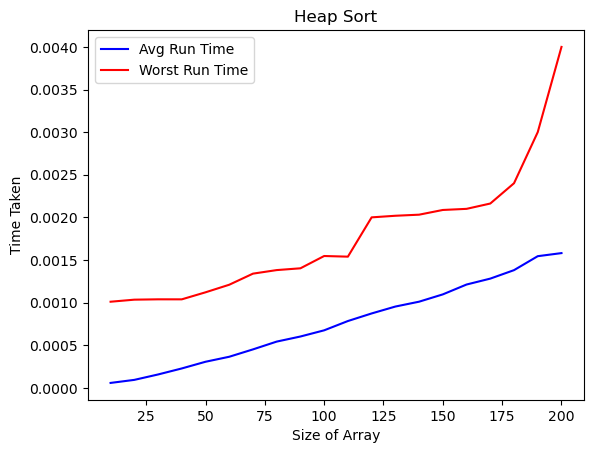

In [14]:
# Data Coordinates
x = np.arange(start_array, end_array+1, increments)
y = np.array(avg_time_taken)
z = np.array(worst_time_taken)

# Plot
plt.plot(x,y,'b',label='Avg Run Time') 
plt.plot(x,z,'r',label='Worst Run Time') 

# Add Title
plt.title("Heap Sort") 

# Add Axes Labels
plt.xlabel("Size of Array") 
plt.ylabel("Time Taken") 

# Display
plt.legend()
plt.show()